The dataset I used can be found [HERE](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset)

train data size:  (2379, 2)
test data size:  (621, 2)


C:\Users\antho\AppData\Local\Temp\ipykernel_6740\4206280936.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.email = test.email.astype(str)


array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

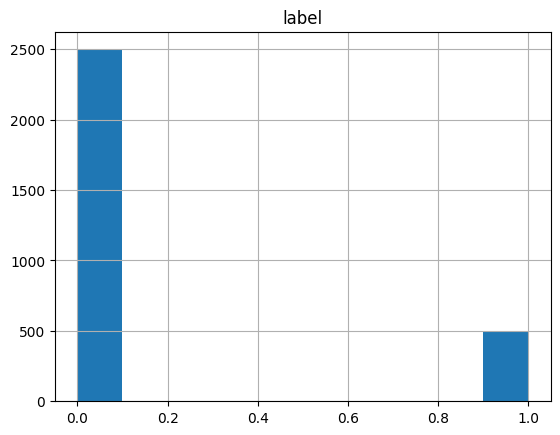

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1234)

#input and clean up data
df = pd.read_csv('data.csv')

#creating train-test split
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

#for some reason test.emails is being treated as floats so now its strings
test.email = test.email.astype(str)

print("train data size: ", train.shape)
print("test data size: ", test.shape)

#creating graph
pd.DataFrame(df["label"]).hist()


Description
The dataset delinates spam and non spam in email text<br/>
The model should be able to predict whether an email is spam or not<br/>
if an Email is spam then output 1 otherwise 0

In [5]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.email)

x_train = tokenizer.texts_to_matrix(train.email, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.email, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

In [6]:
#simple Sequential
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
22/22 [==============================] - 1s 16ms/step - loss: 0.3831 - accuracy: 0.9019 - val_loss: 3.4155 - val_accuracy: 0.0336
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 0.1598 - accuracy: 0.9575 - val_loss: 2.8691 - val_accuracy: 0.2185
Epoch 3/30
22/22 [==============================] - 0s 9ms/step - loss: 0.0848 - accuracy: 0.9869 - val_loss: 3.1195 - val_accuracy: 0.3739
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0474 - accuracy: 0.9967 - val_loss: 3.3445 - val_accuracy: 0.4286
Epoch 5/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9991 - val_loss: 3.4705 - val_accuracy: 0.4874
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0175 - accuracy: 0.9995 - val_loss: 3.6668 - val_accuracy: 0.5420
Epoch 7/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9995 - val_loss: 3.8902 - val_accuracy: 0.5756
Epoch 8/30
22/22 [=

In [7]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

7/7 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.9517
Accuracy:  0.9516907930374146
[0.45421674847602844, 0.9516907930374146]


In [8]:
#attempting RNN
max_features = 10000
maxlen = 500
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 632s 42s/step - loss: 0.2912 - accuracy: 0.9327 - val_loss: 2.1462 - val_accuracy: 0.1744
Epoch 2/10
 3/15 [=====>........................] - ETA: 8:24 - loss: 0.0730 - accuracy: 1.0000

In [ ]:
print(model.summary())
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
print(model.summary())
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])
print(score)

Analysis:<br/>
Overall the RNN took wayyy too long to run for even for the accuracy improvments, with my relatively small dataset the sequential seemed to have very good accuracy relative to the amount of time that it took to run. Embeddings seem to increase the accuracy a bit, however, again the sequential run got most of the way there for a fraction of the runtime.